## Visualization on Australian Fire dataset

All exercises will work on the Australia Fire dataset:
https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland
We will work with fire_nrt_V1_96617.csv which is described here:
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-firedata

### Task 1: Density Plots 

1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):

1) Using the matplotlib defaults.

2) Adjusting alpha and marker size to compensate for overplotting.

3) Using a hexbin plot.

4) Subsampling the dataset.

For each but the first one, ensure that all the plotting area is used in a reasonable way and that
as much information as possible is conveyed; this is somewhat subjective and there is no one
right answer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# Load the dataframe into df
df = pd.read_csv('../AML_git/fire_nrt_V1_96617.csv')

In [3]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    956257 non-null  float64
 1   longitude   956257 non-null  float64
 2   bright_ti4  956257 non-null  float64
 3   scan        956257 non-null  float64
 4   track       956257 non-null  float64
 5   acq_date    956257 non-null  object 
 6   acq_time    956257 non-null  int64  
 7   satellite   956257 non-null  object 
 8   instrument  956257 non-null  object 
 9   confidence  956257 non-null  object 
 10  version     956257 non-null  object 
 11  bright_ti5  956257 non-null  float64
 12  frp         956257 non-null  float64
 13  daynight    956257 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


In [5]:
from random import sample 
# sampling approximately 10% of original data, n = 95625
lat_samp = df['latitude'].sample(n= int(len(df.latitude)* 0.1), random_state=123)
long_samp = df['longitude'].sample(n=int(len(df.latitude)* 0.1), random_state=123);

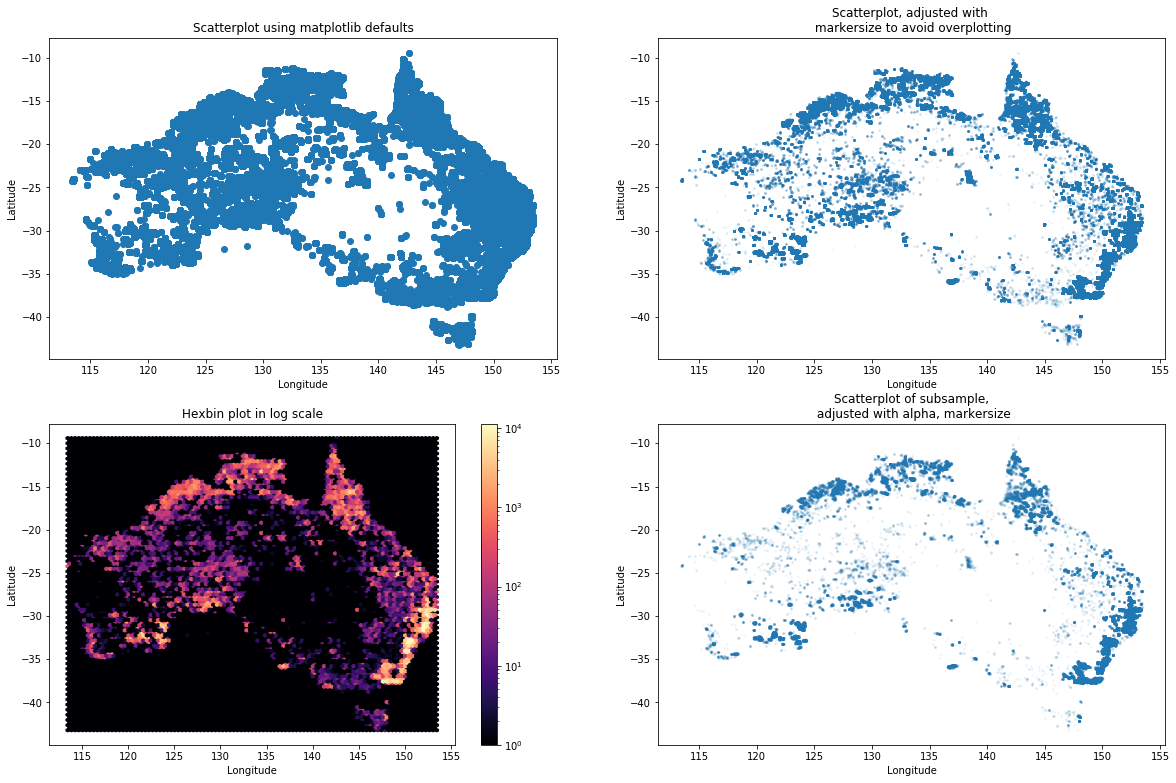

In [6]:
#plotted in longitude (x-axis), latitude (y-axis) to resemble how Australia looks on map

long = df.longitude
lat = df.latitude

fig, ax = plt.subplots(2,2, figsize=(20, 13))
# default scatterplot
ax[0, 0].scatter(long,lat) # same as if used plot(df.longitude,df.latitude, 'o')
ax[0, 0].set_xlabel("Longitude")
ax[0, 0].set_ylabel("Latitude")
ax[0, 0].set_title("Scatterplot using matplotlib defaults")

# adjusted scatterplot
ax[0, 1].scatter(long,lat, alpha=0.05, s=3)
ax[0, 1].set_xlabel("Longitude")
ax[0, 1].set_ylabel("Latitude")
ax[0, 1].set_title("Scatterplot, adjusted with \n markersize to avoid overplotting")

# hexbin plot
hexbinplot = ax[1, 0].hexbin(long,lat, bins ='log', cmap = 'magma')
fig.colorbar(hexbinplot, ax = ax[1,0])
ax[1, 0].set_xlabel("Longitude")
ax[1, 0].set_ylabel("Latitude")
ax[1, 0].set_title("Hexbin plot in log scale")

# sub-sampled scatter plot
ax[1, 1].scatter(long_samp,lat_samp, alpha=0.05, s=3)
ax[1, 1].set_xlabel("Longitude")
ax[1, 1].set_ylabel("Latitude")
ax[1, 1].set_title("Scatterplot of subsample,\n adjusted with alpha, markersize");

### 1.2
 In what areas are most of the anomalies (measurements) located?

Most of the measurements(anomalies) are located near coastline. This observation is more clearly depicted from scatter plot used with alpha setting (upper right and lower right graphs) and also from Hexbin plot (lower left graph). i.e. simple scatter plot, which creates overplotting issue (upper left graph) simply represents location of the spotted measurements but does not really depicts areas where most of the measurements are located.

### Task 2: Visualizing class membership (50 points)

Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate
settings). Let’s assume we are certain of a fire if the value of temperature I-4 is saturated as
visible from the histogram.

### 2.1
Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs
long for those points with brightness saturated and a separate for those who are not (within the
same figure on separate axes). You can pick any of the methods from 1.1 that you find most
suitable. Can you spot differences in the distributions?

top 5 largest counts 
 367.0    136180
355.9      2035
305.9      1955
356.1      1925
306.5      1909
Name: bright_ti4, dtype: int64
bottom 5 smallest counts 
 341.2    1642
340.8    1596
341.7    1599
340.3    1597
340.2    1573
Name: bright_ti4, dtype: int64


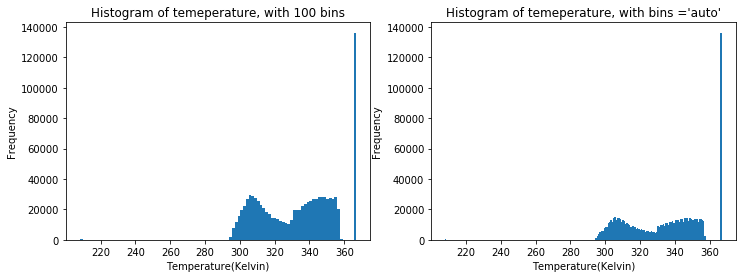

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(df.bright_ti4, bins = 100);
ax[0].set_xlabel("Temperature(Kelvin)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of temeperature, with 100 bins")

ax[1].hist(df.bright_ti4, bins = 'auto');
ax[1].set_xlabel("Temperature(Kelvin)")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram of temeperature, with bins ='auto'")

# look at counts of top 5 largest,smallest values
top5 = df['bright_ti4'].value_counts(sort = True).head()
bot5 = df['bright_ti4'].value_counts(sort = False).head()
print("top 5 largest counts \n", top5)
print("bottom 5 smallest counts \n", bot5)

In [8]:
# shows that the temperature value 367.0 coincides with what 
# the data description file illustrates of saturated brightness temperature

conf_h = df[df.confidence=="h"] # data with confidence level marked has h
len(conf_h[conf_h.bright_ti4 < 367.0])

0

As shown on the above frequency histograms, there is unusually high frequency count of 146180 from temperature value 367.0, compared to frequency counts of all other values, which are from 1642 to 2035. Assuming we are certain of a fire if the value of temperature I-4 is saturated as visible from the histogram, 367.0 would reprsent the temperature value that represents the location has a fire(i.e. saturated). 

Also, the temperature value 367.0 coincides with what the data description file illustrates of saturated brightness temperature in that the measurements that are associated with "h" (high) under confidence column in the datset represents pixels (locations) of brightness saturated (i.e. there is 0 count of temperature value less than 367.0 observed from measurments that are labeled with "h" under confidence column) 

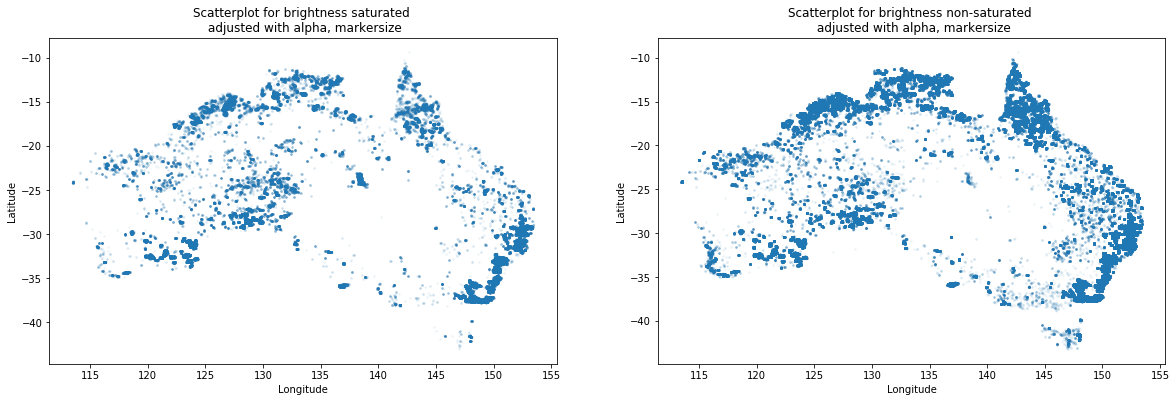

In [9]:
sat_df = df[df.bright_ti4 == 367.0] # saturated data points
N_sat_df = df[df.bright_ti4 != 367.0] # non saturated data points

# here, also plotted longidtue on x-axis to resemble how Australi looks on map
fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].scatter(sat_df.longitude,sat_df.latitude, alpha=0.05, s=3) 
ax[0].set_xlabel("Longitude")                                         
ax[0].set_ylabel("Latitude")                                          
ax[0].set_title("Scatterplot for brightness saturated \n adjusted with alpha, markersize")

ax[1].scatter(N_sat_df.longitude,N_sat_df.latitude, alpha=0.05, s=3)
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].set_title("Scatterplot for brightness non-saturated \n adjusted with alpha, markersize");


In [10]:
print("number of observations from saturated data: ", len(sat_df))
print("number of observations from non saturated data: ", len(N_sat_df))

number of observations from saturated data:  136180
number of observations from non saturated data:  820077


The saturated and non-saturated scatterplots shown above share similar general distribution in that most of the measurements are located near the coastline. However, the number of observations from non-saturated data is about 5 times larger than that from saturated data, and non-saturated's distribution shows that more of data points are located near the costline, particularly in areas near upper-left, upper and right hand side of the costline. Moreover, since the two distributions are drawn seperately, there is a limitation of comparing distribution in detail, and drawing on the single plot would help better to distinguish the two distributions as shown in next part. 

### 2.2 
Plot both groups in the same axes with different colors. Try changing the order of plotting
the two classes (i.e. draw the saturated first then the non-saturated or the other way around).
Make sure to include a legend. How does that impact the result? 

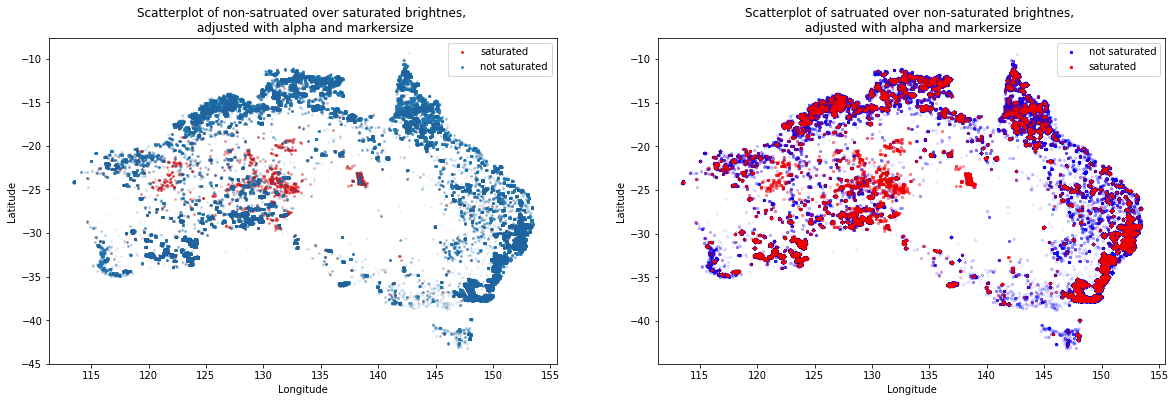

In [11]:
satur_color = "#E81111"

fig, ax = plt.subplots(1,2, figsize=(20,6))
sat = ax[0].scatter(sat_df.longitude, sat_df.latitude, s=3, c= satur_color, label = "saturated")
nsat = ax[0].scatter(N_sat_df.longitude, N_sat_df.latitude, s=3, label = 'not saturated')
ax[0].legend(loc ="best")
sat.set_alpha(0.05)
nsat.set_alpha(0.05)
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].set_title("Scatterplot of non-satruated over saturated brightnes, \n adjusted with alpha and markersize")

nsat = ax[1].scatter(N_sat_df.longitude,N_sat_df.latitude, s=5, c='b', label = "not saturated")
sat = ax[1].scatter(sat_df.longitude,sat_df.latitude, s=5, c='r', label = "saturated")
ax[1].legend(loc ="best")
sat.set_alpha(0.05)
nsat.set_alpha(0.05)
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].set_title("Scatterplot of satruated over non-saturated brightnes, \n adjusted with alpha and markersize");

Compared to plots drawn on 2.1, scatter plots of the two distributions drawn on the same axis with different color marks allow to depict more precise differences in the two distributions. As shown on the left scatterplot above, distinct red marked points appearing near central regions in Australia would represent data points that are recorded soley from saturated data since non-saturated data points are drawn over saturated data points. Similarly, looking at the right scatterplot, there are distinctive data points marked in blue that are recorded soley from non-saturated data points. This observation coincides with what was mentiond in part 2.1 in that more of data points from non-saturated data sets are locased close to coastline. Overall, plotting the two distributions in a single plot with different order of plotting allow us to identify unseen location of datapoints in repsect to the other distribution.

### 2.3
Can you find a better way to compare the two distributions?

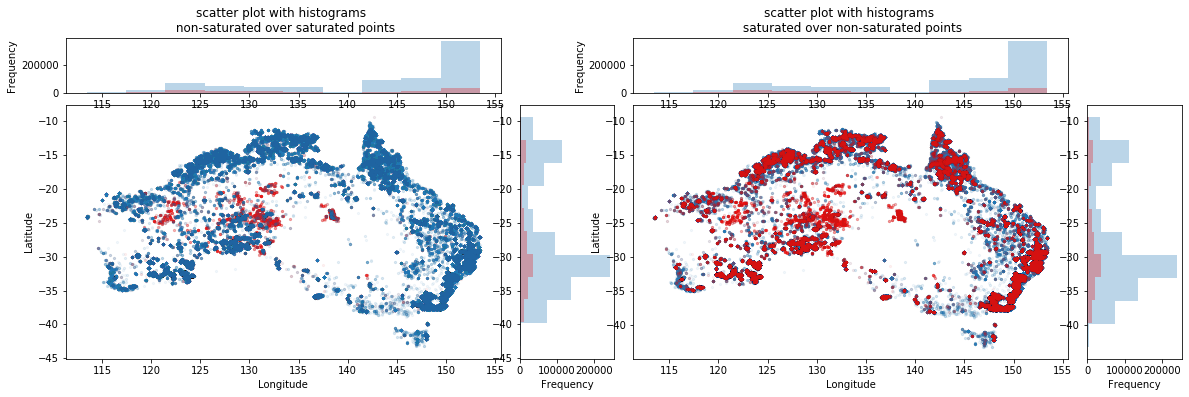

In [12]:
plt.figure(figsize=(20,12))
#left plot -   non-saturated over saturated points
scat_ax = plt.subplot2grid((10, 10), (1, 0), rowspan=4, colspan=4)
long_hist_ax = plt.subplot2grid((10, 10), (0, 0), colspan=4, sharex=scat_ax)
lat_hist_ax = plt.subplot2grid((10, 10), (1, 4), rowspan=4, sharey=scat_ax)

scat_ax.scatter(sat_df.longitude, sat_df.latitude, s=5, color = satur_color, alpha=0.05)
scat_ax.scatter(N_sat_df.longitude, N_sat_df.latitude, s=5, alpha=0.05)
long_hist_ax.hist(N_sat_df.longitude, alpha =0.3)
long_hist_ax.hist(sat_df.longitude, alpha =0.3, color =satur_color)
lat_hist_ax.hist(N_sat_df.latitude, alpha =0.3, orientation='horizontal')
lat_hist_ax.hist(sat_df.latitude, alpha =0.3, color =satur_color, orientation='horizontal')

scat_ax.set_xlabel("Longitude")
scat_ax.set_ylabel("Latitude")
long_hist_ax.set_ylabel("Frequency")
lat_hist_ax.set_xlabel("Frequency")
long_hist_ax.set_title("scatter plot with histograms \n non-saturated over saturated points")


# right plot - saturated over non-saturated points
scat_ax2 = plt.subplot2grid((10, 10), (1, 5), rowspan=4, colspan=4)
long_hist_ax2 = plt.subplot2grid((10, 10), (0, 5), colspan=4, sharex=scat_ax2)
lat_hist_ax2 = plt.subplot2grid((10, 10), (1, 9), rowspan=4, sharey=scat_ax2)

scat_ax2.scatter(N_sat_df.longitude, N_sat_df.latitude, s=5, alpha=0.05)
scat_ax2.scatter(sat_df.longitude, sat_df.latitude,s=5, color = satur_color, alpha=0.05)
long_hist_ax2.hist(N_sat_df.longitude, alpha =0.3)
long_hist_ax2.hist(sat_df.longitude, alpha =0.3, color =satur_color)
lat_hist_ax2.hist(N_sat_df.latitude, alpha =0.3, orientation='horizontal')
lat_hist_ax2.hist(sat_df.latitude, alpha =0.3, color =satur_color, orientation='horizontal')

scat_ax2.set_xlabel("Longitude")
scat_ax2.set_ylabel("Latitude")
long_hist_ax2.set_ylabel("Frequency")
lat_hist_ax2.set_xlabel("Frequency")
long_hist_ax2.set_title("scatter plot with histograms \n saturated over non-saturated points");


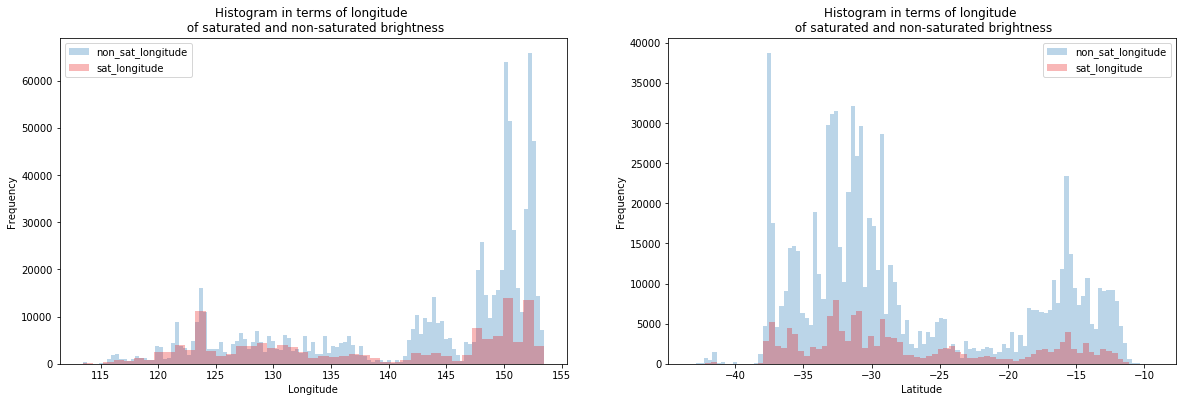

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].hist(N_sat_df.longitude, bins = 'auto', alpha =0.3,  label = "non_sat_longitude");
ax[0].hist(sat_df.longitude, bins = 'auto', alpha =0.3,color =satur_color, label = "sat_longitude");
ax[0].legend(loc = 'best')
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram in terms of longitude \n of saturated and non-saturated brightness");

ax[1].hist(N_sat_df.latitude, bins = 'auto', alpha =0.3, label = "non_sat_longitude");
ax[1].hist(sat_df.latitude, bins = 'auto', alpha =0.3,  color =satur_color, label = "sat_longitude");
ax[1].legend(loc = 'best')
ax[1].set_xlabel("Latitude")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram in terms of longitude \n of saturated and non-saturated brightness");

The first two plots shown above each represents a joint density plot (scatterplot + two histograms of frequencies with respect to longitude and latitude). The left joint density plot differs from the right in that the left plots non-saturated data points over saturated data points, just like what was shown on task 2.2.

And the second two histograms represents more detailed (i.e. zoomed) versions of histograms that are drawn on top and right hand side of the scatter plots. The plots compare frequency counts in terms of longitude and latitude of saturated and non-saturated brightness data points and demonstrate differences in the two distributions in a different perspective. First looking at the left histogram, there is clear, huge difference in frequency counts  between saturated and non saturated datapoints in latitude range approximately from 140 to146, and from 147 to 153. This represents that in respect to longitude, there are much more non-saturated data points than saturated data points recorded in the right side of Australia from longitude of 140 or higher. On the other hand, looking at the right histogram, there is overall large amount of difference in frequency counts between the two histograms, and the difference is distinctively large for some latitude locations from -37 to 28 and around -15.

The above combined scatterplots and histograms provides a better view to compare the two distributions in that these plots compensate what were shown on taks 2.1 and 2.2. In part 2.1, since the plots were drawn on seperate axes, it could not identify locations of certain data points that are not prsent in respect to the other distribution. On the other hand, plots in part 2.2 had limitation of representing degree of which certain areas have more data points between the two distribution (i.e. in which locations data poins are more plotted). With both scatterplots and histograms drawn togegther, the joint density plots are now able to both indicate locations of which distriubtion has more data points and also able to identify location of data points that were not present in repsect to each other's distribution.